In [1]:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#We have to build a decision tree with target variable sale.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df1=df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

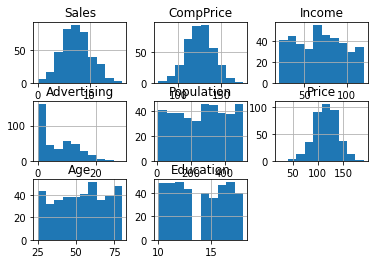

In [8]:
df1.hist()

In [9]:
df1.shape

(400, 11)

C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


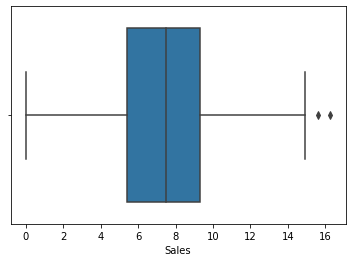

In [10]:
ax=sns.boxplot(df1['Sales'])

In [11]:
# From the boxplot,we observe that our target variable 'Sales' has two outliers.

In [12]:
# Before proceeding for decision trees, we will have to convert datatypes of all the cplomns to 'int'.

In [13]:
df1=pd.get_dummies(df1,columns=['ShelveLoc','Urban','US'])

In [14]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
# We observe that our target variable is continuous,so first we will have to convert it into categorical variable.
# We will use the mean for this conversion.

In [16]:
df.mean()

C:\Users\Avanti\AppData\Local\Temp/ipykernel_22700/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [17]:
# Depending on the mean, we will create the classes such that,
# <= 7.49 == "Small" and > 7.49 == "large"

In [18]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [19]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CompPrice         400 non-null    int64 
 1   Income            400 non-null    int64 
 2   Advertising       400 non-null    int64 
 3   Population        400 non-null    int64 
 4   Price             400 non-null    int64 
 5   Age               400 non-null    int64 
 6   Education         400 non-null    int64 
 7   ShelveLoc_Bad     400 non-null    uint8 
 8   ShelveLoc_Good    400 non-null    uint8 
 9   ShelveLoc_Medium  400 non-null    uint8 
 10  Urban_No          400 non-null    uint8 
 11  Urban_Yes         400 non-null    uint8 
 12  US_No             400 non-null    uint8 
 13  US_Yes            400 non-null    uint8 
 14  sales             400 non-null    object
dtypes: int64(7), object(1), uint8(7)
memory usage: 27.9+ KB


In [21]:
# Now the data is ready for further processing.

In [22]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,14]

In [23]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No
0,138,73,11,276,120,42,17,1,0,0,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0


In [24]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [25]:
# Splitting the data into train and test.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [26]:
x_train.shape,x_test.shape

((280, 13), (120, 13))

In [27]:
y_train.value_counts()

large    147
small    133
Name: sales, dtype: int64

# Building Decision Tree 

In [30]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[8] <= 0.5\nentropy = 0.998\nsamples = 280\nvalue = [147, 133]'),
 Text(0.3333333333333333, 0.625, 'X[4] <= 102.5\nentropy = 0.982\nsamples = 218\nvalue = [92, 126]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 81.5\nentropy = 0.825\nsamples = 58\nvalue = [43, 15]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.25, 0.125, 'entropy = 0.947\nsamples = 41\nvalue = [26, 15]'),
 Text(0.5, 0.375, 'X[7] <= 0.5\nentropy = 0.889\nsamples = 160\nvalue = [49, 111]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.971\nsamples = 110\nvalue = [44, 66]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.469\nsamples = 50\nvalue = [5, 45]'),
 Text(0.75, 0.625, 'X[4] <= 135.0\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.8333333333333334, 0.375, 'X[1] <= 62.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.75, 0.125, 'entr

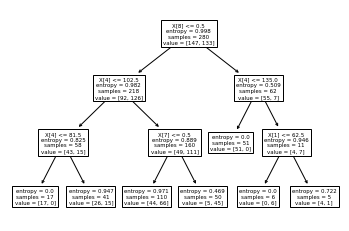

In [31]:
# Plotting the Decision Tree.
tree.plot_tree(model)

In [32]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

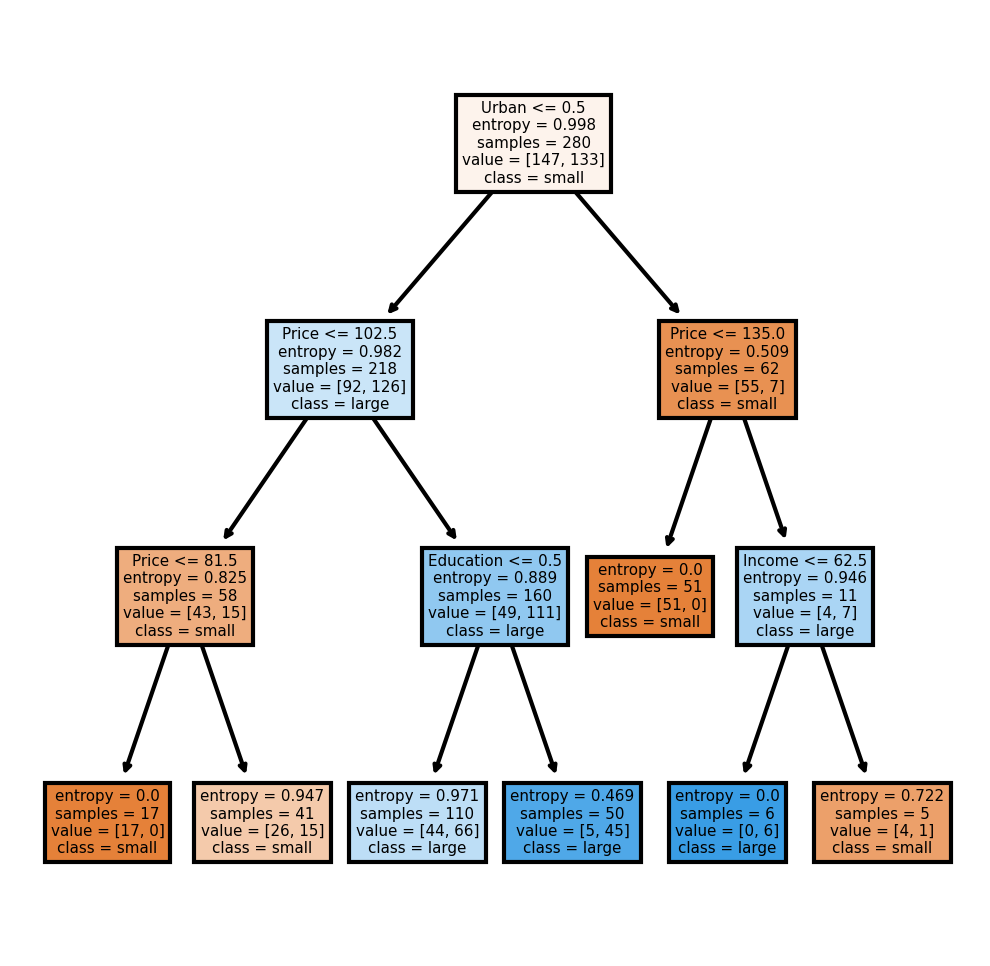

In [33]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['small', 'large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

small    65
large    55
dtype: int64

In [35]:
preds

array(['large', 'small', 'small', 'large', 'large', 'small', 'large',
       'large', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'large', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'large', 'large', 'small', 'small', 'small', 'large',
       'small', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'sma

In [36]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,large,small
sales,,
large,36,16
small,19,49


In [37]:
# Test Accuracy 
np.mean(preds==y_test)

0.7083333333333334

In [38]:
# We got the accuracy of 70.83%.

In [39]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':preds})

In [40]:
df_t

,Actual,Predicted
132,large,large
390,small,small
310,large,small
3,small,large
248,small,large
...,...,...
381,small,small
53,small,small
229,large,large
303,large,large


In [41]:
# Let's try to add one more parameter and then see for the results again.

In [42]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

[Text(0.5909090909090909, 0.875, 'X[8] <= 0.5\nentropy = 0.998\nsamples = 280\nvalue = [147, 133]'),
 Text(0.36363636363636365, 0.625, 'X[4] <= 102.5\nentropy = 0.982\nsamples = 218\nvalue = [92, 126]'),
 Text(0.18181818181818182, 0.375, 'X[4] <= 81.5\nentropy = 0.825\nsamples = 58\nvalue = [43, 15]'),
 Text(0.09090909090909091, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.2727272727272727, 0.125, 'entropy = 0.947\nsamples = 41\nvalue = [26, 15]'),
 Text(0.5454545454545454, 0.375, 'X[7] <= 0.5\nentropy = 0.889\nsamples = 160\nvalue = [49, 111]'),
 Text(0.45454545454545453, 0.125, 'entropy = 0.971\nsamples = 110\nvalue = [44, 66]'),
 Text(0.6363636363636364, 0.125, 'entropy = 0.469\nsamples = 50\nvalue = [5, 45]'),
 Text(0.8181818181818182, 0.625, 'X[4] <= 135.0\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.7272727272727273, 0.375, 'entropy = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.9090909090909091, 0.375, 'entropy = 0.946\nsamples = 11\nvalue = [4,

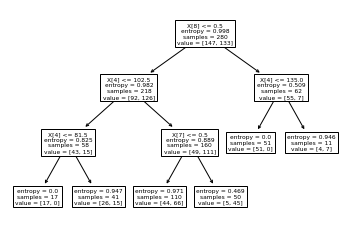

In [43]:
tree.plot_tree(model1)

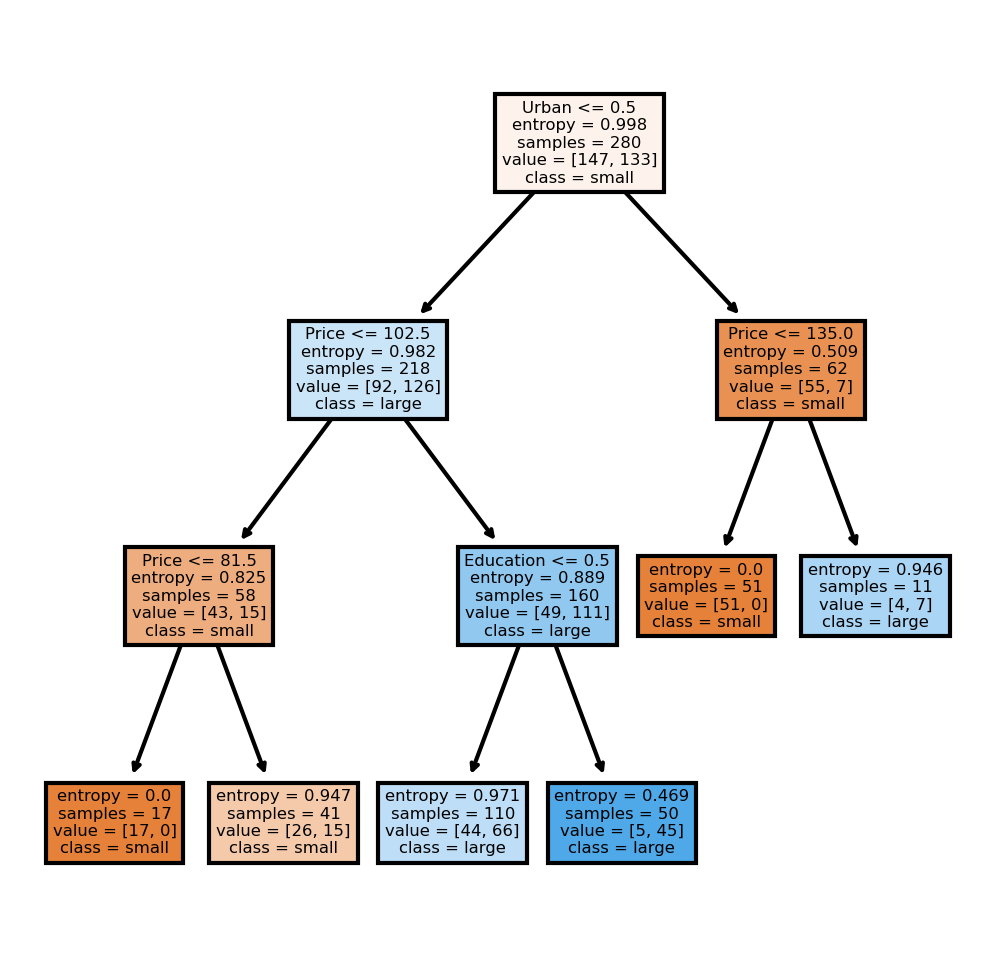

In [47]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['small', 'large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
# This tree looks a bit different,since we have added a parameter min_samples_leaf=10.

In [49]:
#Predicting on test data
preds1 = model1.predict(x_test) # predicting on test data set 
pd.Series(preds1).value_counts() # getting the count of each category 

small    70
large    50
dtype: int64

In [50]:
pd.crosstab(y_test,preds1) # getting the 2 way table to understand the correct and wrong predictions

col_0,large,small
sales,,
large,34,18
small,16,52


In [51]:
# Test Accuracy 
np.mean(preds1==y_test)

0.7166666666666667

In [52]:
# The accuracy is increased a little bit.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [53]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=10)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

[Text(0.5909090909090909, 0.875, 'X[8] <= 0.5\ngini = 0.499\nsamples = 280\nvalue = [147, 133]'),
 Text(0.36363636363636365, 0.625, 'X[4] <= 102.5\ngini = 0.488\nsamples = 218\nvalue = [92, 126]'),
 Text(0.18181818181818182, 0.375, 'X[4] <= 86.5\ngini = 0.383\nsamples = 58\nvalue = [43, 15]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.475\nsamples = 36\nvalue = [22, 14]'),
 Text(0.5454545454545454, 0.375, 'X[2] <= 11.5\ngini = 0.425\nsamples = 160\nvalue = [49, 111]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.332\nsamples = 114\nvalue = [24, 90]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.8181818181818182, 0.625, 'X[4] <= 135.0\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]')]

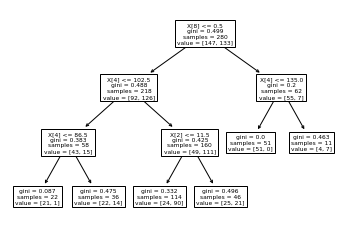

In [54]:
tree.plot_tree(model_gini)

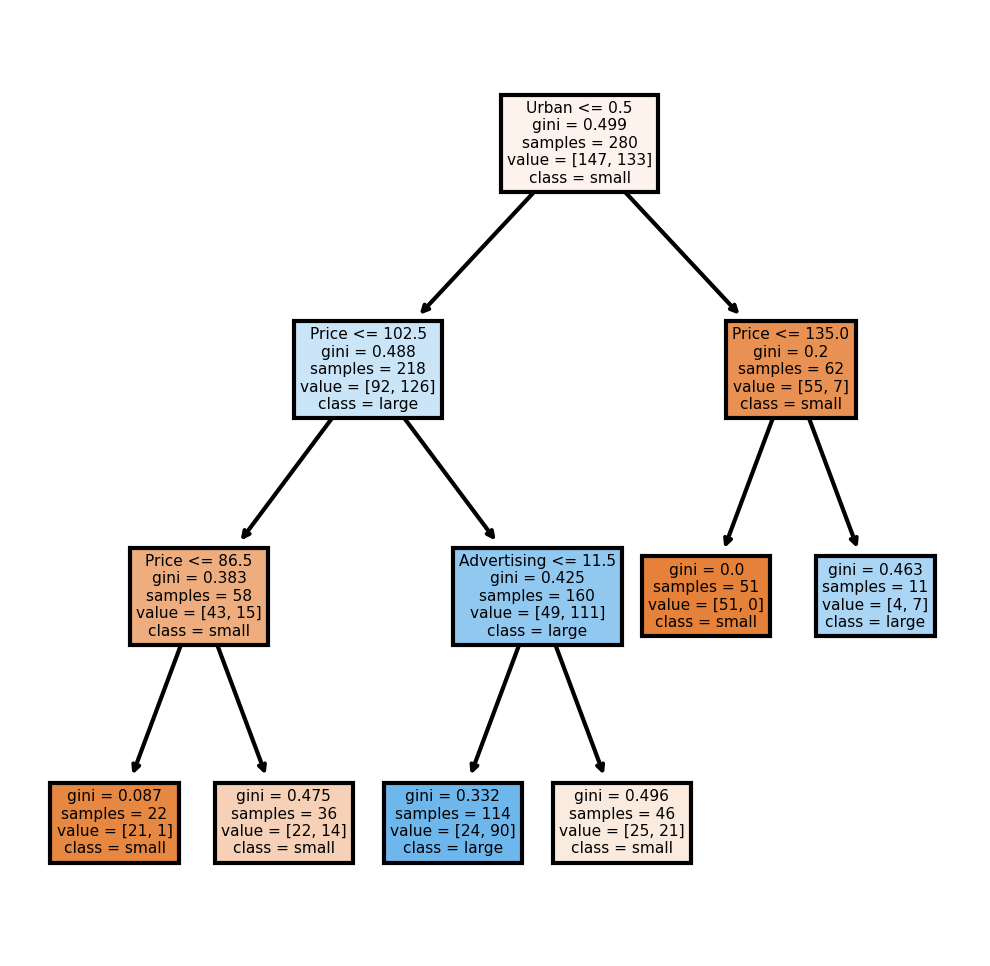

In [55]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['small', 'large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [56]:
#Prediction and computing the accuracy
pred2=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7083333333333334

In [57]:
# We get almost same results.